# Project details - regression

En este notebook se encuentran resueltos los problemas propuestos en "Project details - regression".

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_excel("regression_data (1).xls")

In [6]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


Ahora nos quedamos solo con las columnas que nos interesan ya que hay muchas que sobrán, y tomaremos el precio como una variable dependiente y el resto como variables independientes

# Coger datos necesarios y definir  variables dep. indep.

In [35]:
#variables independientes
x = df.drop(["price",'bedrooms', "bathrooms","zipcode","sqft_living","sqft_lot","floors","view","sqft_basement","yr_built","yr_renovated","lat","long"], axis=1)
x

,id,date,waterfront,condition,grade,sqft_above,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,0,3,7,1180,1340,5650
1,6414100192,2014-12-09,0,3,7,2170,1690,7639
2,5631500400,2015-02-25,0,3,6,770,2720,8062
3,2487200875,2014-12-09,0,5,7,1050,1360,5000
4,1954400510,2015-02-18,0,3,8,1680,1800,7503
...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,0,3,8,1530,1530,1509
21593,6600060120,2015-02-23,0,3,8,2310,1830,7200
21594,1523300141,2014-06-23,0,3,7,1020,1020,2007
21595,291310100,2015-01-16,0,3,8,1600,1410,1287


In [36]:
#variable dependiente
y = df["price"]
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21592    360000
21593    400000
21594    402101
21595    400000
21596    325000
Name: price, Length: 21597, dtype: int64

In [37]:
import matplotlib.pyplot as plt

Para empezar a visualizar los datos, veamos unos graficos del precio (variable dependiente) con respecto del resto de las variables para ver como se relacionan. (Podríamos haber hecho esto despues de la estandarización de las variables numéricas pero no hubiese cambiado el resultado).

# Visualización de precio respecto a variables pedidas

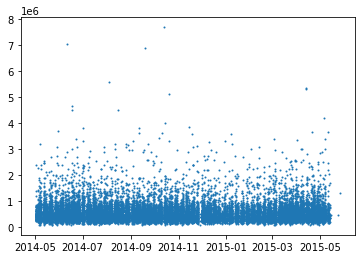

In [38]:
plt.scatter(df["date"], df["price"],s=1)
plt.show()

Con respecto a la fecha podemos observar que tiene una distribución bastante equilibrada

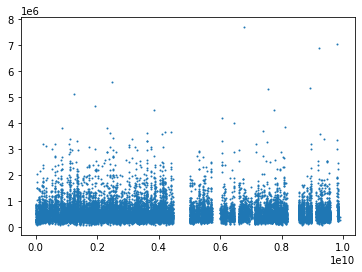

In [39]:
plt.scatter(df["id"], df["price"],s=1)
plt.show()

Con respecto al id podemos observar que tiene una distribución bastante equilibrada, pero vemos que faltan algunos tramos de valores

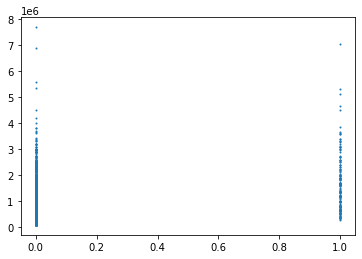

In [40]:
plt.scatter(df["waterfront"], df["price"],s=1)
plt.show()

Este gráfico no nos aporta mucha información, por lo que lo omitiremos

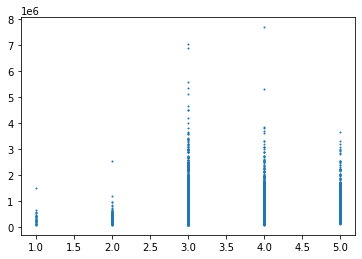

In [41]:
plt.scatter(df["condition"], df["price"],s=1)
plt.show()

Podemos observar que según disminuye la condición, también el precio proporcionalmente, pero al aumentar a partir del grado 3, parece mantenerse parecido, por lo que podemos deducir que la condición influye en el precio en el caso de que sea menor que la media.

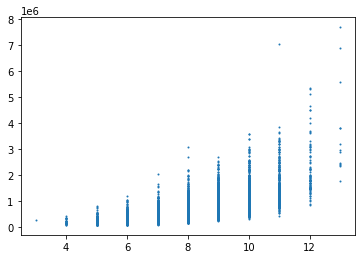

In [42]:
plt.scatter(df["grade"], df["price"],s=1)
plt.show()

En este caso vemos claramente como según aumenta el grado, el precio también suele ir aumentando, por lo que probablemente este data point sea uno de los mejores predictores del precio de la vivienda

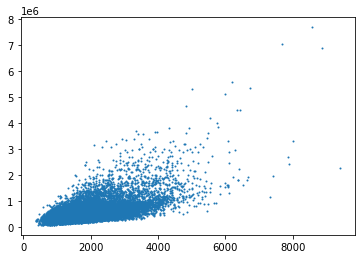

In [43]:
plt.scatter(df["sqft_above"], df["price"],s=1)
plt.show()

Con respecto a los metros cuadrados aparte del sótano podemos observar una relación lineal positva moderada

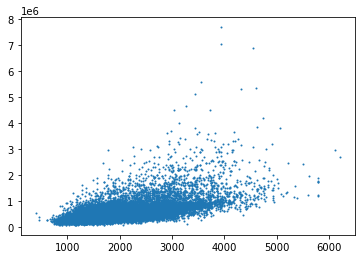

In [44]:
plt.scatter(df["sqft_living15"], df["price"],s=1)
plt.show()

Con respecto a los metros cuadrados habitables podemos observar una pequeña relación lineal positiva

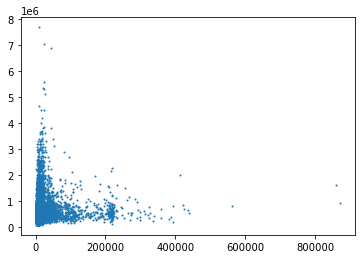

In [45]:
plt.scatter(df["sqft_lot15"], df["price"],s=1)
plt.show()

No podemos asumir gran cosa con respecto a los metros cuadrados totales 

# Tipos de variables

Ahora, antes de comenzar con la limpieza de datos, escalemos las variables numéricas y codifiquemos las variables categóricas. Para eso debemos saber cual es cual así que hagamos un listado.<br>
<br>
id = numérica<br>
date = numérica<br>
waterfront = categórica<br>
condition = numérica<br>
grade = numérica<br>
sqft_above = numérica<br>
sqft_living15 = numérica<br>
sqft_lot15 = numérica<br>
price = numérica<br>
<br>
Por lo que sólo waterfront será categórica. Podemos observar que esta variable solo tiene dos posibles resultados y ya esta codificada a "1" para verdadero y "0" para falso, por lo que no será necesario cambiar nada.<br>

Para los resultados numéricos, por usar un algoritmo de machine learning que tiene en cuenta el gradiente (para la regresion lineal) para que todas las variables tengan la misma escala, debemos escalarlos de manera apropiada, y hay dos maneras de hacer esto, por normalización y por estandarización. Generalmente se suele preferir la estandarización cuando nos encontramos con muchos valores atípicos, ya que este método no está restringido a unos valores máximos y mínimos, pero como no es el caso en nuestros datos, utilizaré el método de normalización. 

In [68]:
#amplia representacion de datos
x.describe().round(2)

,id,waterfront,condition,grade,sqft_above,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,0.01,3.41,7.66,1788.60,1986.62,12758.28
std,2.876736e+09,0.09,0.65,1.17,827.76,685.23,27274.44
min,1.000102e+06,0.00,1.00,3.00,370.00,399.00,651.00
25%,2.123049e+09,0.00,3.00,7.00,1190.00,1490.00,5100.00
50%,3.904930e+09,0.00,3.00,7.00,1560.00,1840.00,7620.00
75%,7.308900e+09,0.00,4.00,8.00,2210.00,2360.00,10083.00
max,9.900000e+09,1.00,5.00,13.00,9410.00,6210.00,871200.00


# Anomalías

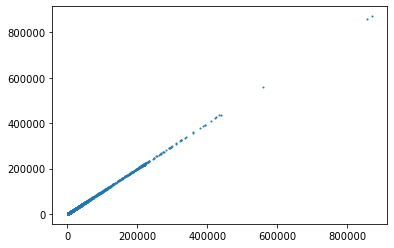

In [121]:
plt.scatter(df["sqft_lot15"], df["sqft_lot15"],s=1)
plt.show()

Podemos observar que hay 3 datos que están totalmente separados del resto, por lo que los eliminaremos del dataset para conseguir una normalización mejor

In [124]:
df2 = df

In [129]:
df2 = df.sqft_lot15.sort_values(ascending=False).head(10)
df2.head(50)

9705     871200
20436    858132
13451    560617
8655     438213
3797     434728
1717     425581
19141    422967
6685     411962
21415    392040
15606    392040
Name: sqft_lot15, dtype: int64

Podemos ver que los tres valores más altos son datos atípicos y nos molestarían a la hora de normalizar los datos, por lo que vamo a eliminarlos

In [156]:
df2 = df
df2

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


# Eliminar anomalías

In [157]:
#df2 = df2.drop(df2.index[9705,20436,13451],axis=0)
df2=df2.drop(df2.index[9705])
df2=df2.drop(df2.index[20436-1])
df2=df2.drop(df2.index[13451-1])
df2

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [167]:
df3 = df2.sqft_lot15.sort_values(ascending=False).head(10)
df3.head(50)

8655     438213
3797     434728
1717     425581
19141    422967
6685     411962
15606    392040
21415    392040
17645    386812
11171    380279
11552    360000
Name: sqft_lot15, dtype: int64

como ya hemos quitado los datos atípicos empecemos con el proceso de normalización

In [168]:
x = df2.drop(["price",'bedrooms', "bathrooms","zipcode","sqft_living","sqft_lot","floors","view","sqft_basement","yr_built","yr_renovated","lat","long"], axis=1)
x

,id,date,waterfront,condition,grade,sqft_above,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,0,3,7,1180,1340,5650
1,6414100192,2014-12-09,0,3,7,2170,1690,7639
2,5631500400,2015-02-25,0,3,6,770,2720,8062
3,2487200875,2014-12-09,0,5,7,1050,1360,5000
4,1954400510,2015-02-18,0,3,8,1680,1800,7503
...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,0,3,8,1530,1530,1509
21593,6600060120,2015-02-23,0,3,8,2310,1830,7200
21594,1523300141,2014-06-23,0,3,7,1020,1020,2007
21595,291310100,2015-01-16,0,3,8,1600,1410,1287


In [169]:
y = df2["price"]
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21592    360000
21593    400000
21594    402101
21595    400000
21596    325000
Name: price, Length: 21594, dtype: int64

# Normalizar variables numéricas

In [170]:
from sklearn.preprocessing import MinMaxScaler

In [171]:
scaler = MinMaxScaler() 


In [172]:
x1 = x.drop(["date"], axis=1)
# no tenemos en cuenta la fecha, ya que viendo el diagrama nos damos cuenta de que es una variable que no tiene nada que ver con el comportamiento del precio, y tambiéno por que buscando por todo internet no he encontrado de como se supone que hay que estandarizarlo
x1

,id,waterfront,condition,grade,sqft_above,sqft_living15,sqft_lot15
0,7129300520,0,3,7,1180,1340,5650
1,6414100192,0,3,7,2170,1690,7639
2,5631500400,0,3,6,770,2720,8062
3,2487200875,0,5,7,1050,1360,5000
4,1954400510,0,3,8,1680,1800,7503
...,...,...,...,...,...,...,...
21592,263000018,0,3,8,1530,1530,1509
21593,6600060120,0,3,8,2310,1830,7200
21594,1523300141,0,3,7,1020,1020,2007
21595,291310100,0,3,8,1600,1410,1287


In [173]:
# normalizamos el dataframe
x1 = scaler.fit_transform(x1)
x1

array([[0.72010308, 0.        , 0.5       , ..., 0.08960177, 0.16193426,
        0.01142467],
       [0.64785332, 0.        , 0.5       , ..., 0.19911504, 0.22216486,
        0.01597031],
       [0.56879485, 0.        , 0.5       , ..., 0.04424779, 0.3994149 ,
        0.01693703],
       ...,
       [0.15378321, 0.        , 0.5       , ..., 0.07190265, 0.10686629,
        0.00309899],
       [0.0293272 , 0.        , 0.5       , ..., 0.13606195, 0.17398038,
        0.00145351],
       [0.15378321, 0.        , 0.5       , ..., 0.07190265, 0.10686629,
        0.00161349]])

In [174]:
# lo convertimos en data frame de nuevo
x1 = pd.DataFrame(x1, columns = ["id","waterfront","condition","grade","sqft_above","sqft_living15","sqft_lot15"])
x1

,id,waterfront,condition,grade,sqft_above,sqft_living15,sqft_lot15
0,0.720103,0.0,0.5,0.4,0.089602,0.161934,0.011425
1,0.647853,0.0,0.5,0.4,0.199115,0.222165,0.015970
2,0.568795,0.0,0.5,0.3,0.044248,0.399415,0.016937
3,0.251157,0.0,1.0,0.4,0.075221,0.165376,0.009939
4,0.197333,0.0,0.5,0.5,0.144912,0.241094,0.015659
...,...,...,...,...,...,...,...
21589,0.026467,0.0,0.5,0.5,0.128319,0.194631,0.001961
21590,0.666639,0.0,0.5,0.5,0.214602,0.246257,0.014967
21591,0.153783,0.0,0.5,0.4,0.071903,0.106866,0.003099
21592,0.029327,0.0,0.5,0.5,0.136062,0.173980,0.001454


# Exploramos datos

In [175]:
x1.describe().round(2)

,id,waterfront,condition,grade,sqft_above,sqft_living15,sqft_lot15
count,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00,21594.00
mean,0.46,0.01,0.60,0.47,0.16,0.27,0.03
std,0.29,0.09,0.16,0.12,0.09,0.12,0.06
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.21,0.00,0.50,0.40,0.09,0.19,0.01
50%,0.39,0.00,0.50,0.40,0.13,0.25,0.02
75%,0.74,0.00,0.75,0.50,0.20,0.34,0.02
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [176]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21594 entries, 0 to 21593
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21594 non-null  float64
 1   waterfront     21594 non-null  float64
 2   condition      21594 non-null  float64
 3   grade          21594 non-null  float64
 4   sqft_above     21594 non-null  float64
 5   sqft_living15  21594 non-null  float64
 6   sqft_lot15     21594 non-null  float64
dtypes: float64(7)
memory usage: 1.2 MB


In [205]:
from pandas_profiling import ProfileReport
profile = ProfileReport(x1)

In [210]:
#profile

# quitar esa almohadilla para ver un detallado analisis del dataset, pero si lo dejo puesto al subirlo a github sale muy mal


Ahora, aparte de haber usado el método describe y adicionalmente, haber hecho los gráficos de las variabnles con respecto a el precio, exploremos más a fondo los datos viendo si hay valores que faltan.

In [179]:
x1.isnull()
# en el caso de que haya algun valor faltando devolveria true

,id,waterfront,condition,grade,sqft_above,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
21589,False,False,False,False,False,False,False
21590,False,False,False,False,False,False,False
21591,False,False,False,False,False,False,False
21592,False,False,False,False,False,False,False


In [180]:
x1.isnull().sum()
# devuelve número de Trues

id               0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_living15    0
sqft_lot15       0
dtype: int64

Podemos observar que no falta ningún valor en este Data set, pero en el caso de que si faltasen, quitaríamos esos valores del dataset, o en el caso de que hubiese varios casos así, los reemplazariamos por la media.

Veamos algunos gráficos más que exploren los datos


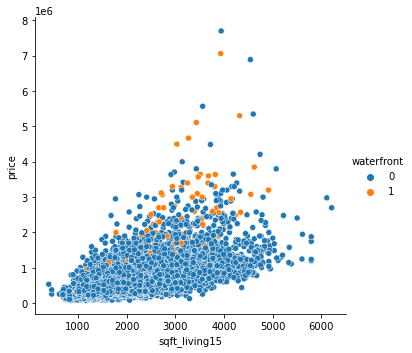

In [181]:
sns.relplot(y="price",x="sqft_living15",hue = "waterfront",data=df)

Podemo ver que los data points naranjas, que son los que tienen vistas a un cuerpo de agua, son bastante más caros que una vivienda normal.

Ahora que ya hemos explorado y comprobado para anomalías en nuestros datos, y también hemos estandarizado los mismos, estamos listos para crear el modelo.

# Creamos el modelo de regresión

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [183]:
train = x1
test = y

In [184]:
x_train, x_test, y_train, y_test = train_test_split(train,test, test_size=0.3, random_state = 0)

In [185]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [186]:
pred = regr.predict(x_test)

In [187]:
pred

array([791178.36247008, 579270.73433567, 503477.82470666, ...,
       431518.50697014, 397572.3370559 , 233610.57356352])

In [188]:
# comprobamos eficiencia del modelo
regr.score(x_test,y_test)


0.5518255563208315

In [189]:
#probemos a ver is eliminar alguna variable mejoraría la eficiencia de nuestro modelo
train = x1.drop(["id"], axis=1)
test = y
x_train, x_test, y_train, y_test = train_test_split(train,test, test_size=0.3, random_state = 0)
regr = LinearRegression()
regr.fit(x_train,y_train)
regr.score(x_test,y_test)

0.551406758763396

Vemos que NO utilizar el id para predecir el precia mejora (aunque sea por muy poco) nuestra eficiencia, ya que el id no tiene nada que ver con la calidad de la casa en ningún respecto.

In [190]:
#probemos con alguna otra variable
train = x1.drop(["waterfront"], axis=1)
test = y
x_train, x_test, y_train, y_test = train_test_split(train,test, test_size=0.3, random_state = 0)
regr = LinearRegression()
regr.fit(x_train,y_train)
regr.score(x_test,y_test)

0.513599305352658

Como podíamos esperar si retiramos las vistas al mar, que son un gran predictor de que la casa valga más, nuestra eficiencia baja

In [191]:
#probemos con alguna otra variable
train = x1.drop(["sqft_lot15","id"], axis=1)
test = y
x_train, x_test, y_train, y_test = train_test_split(train,test, test_size=0.3, random_state = 0)
regr = LinearRegression()
regr.fit(x_train,y_train)
regr.score(x_test,y_test)

0.5504675374710886

Después de probar con el resto de las variables vemos que la única que contribuía negativamente era el id, por lo que retiraremos esa variable

In [192]:
train = x1
test = y
x_train, x_test, y_train, y_test = train_test_split(train,test, test_size=0.3, random_state = 0)
regr = LinearRegression()
regr.fit(x_train,y_train)
regr.score(x_test,y_test)

0.5518255563208315

In [193]:
y_pred = regr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5518255563208315

# Buscamos las variables más importantes a la hora de predecir el precio

Para encontrar las 4 variables más influyentes (positivamente o negativamente) veremos la eficencia de los algoritmos

Variable: 0, Score: -25939.01452
Variable: 1, Score: 898754.91083
Variable: 2, Score: 316828.14864
Variable: 3, Score: 1360901.99179
Variable: 4, Score: 831602.24981
Variable: 5, Score: 411066.69828
Variable: 6, Score: -301904.42054


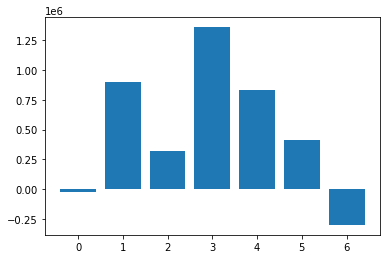

In [194]:
importance = regr.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Variable: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

la función coef_() devuelve el coeficiente de cada variable, es decir la importancia de esa variable al predecir el precio de la vivienda. <br>
Podemos observar que las variables más importantes a la hora de predecir el precio son las siguientes (en orden):<br>
1: variable 3, es decir el grado<br>
2: variable 1, es decir si tiene vistas a un cuerpo de agua o no<br>
3: variable 4, es decir metros cuadrados a parte del sótano<br>
4: variable 5, es decir metros cuadrados de zona habitable<br>

In [195]:
x1

,id,waterfront,condition,grade,sqft_above,sqft_living15,sqft_lot15
0,0.720103,0.0,0.5,0.4,0.089602,0.161934,0.011425
1,0.647853,0.0,0.5,0.4,0.199115,0.222165,0.015970
2,0.568795,0.0,0.5,0.3,0.044248,0.399415,0.016937
3,0.251157,0.0,1.0,0.4,0.075221,0.165376,0.009939
4,0.197333,0.0,0.5,0.5,0.144912,0.241094,0.015659
...,...,...,...,...,...,...,...
21589,0.026467,0.0,0.5,0.5,0.128319,0.194631,0.001961
21590,0.666639,0.0,0.5,0.5,0.214602,0.246257,0.014967
21591,0.153783,0.0,0.5,0.4,0.071903,0.106866,0.003099
21592,0.029327,0.0,0.5,0.5,0.136062,0.173980,0.001454


# Comparar errores

Ahora, para asegurarnos de que nuestro modelo no sufra de Underfitting u Overfitting, calcularemos el error mínimo medio y  el error cuadrado medio

In [196]:
from sklearn.metrics import mean_absolute_error as mae

In [197]:
error = mae(y_test, y_pred)

In [198]:
error

161841.5725193499

In [199]:
from sklearn.metrics import mean_squared_error

In [200]:
mean_squared_error(y_test,y_pred)

55626732817.59263

# Cuales son los mejores factores para predecir un precio alto

Por último sólo nos queda averiguar que parametros son responsables de un valor de propiedad alto (650k+)

Como ya sabemos el grado es el mejor predictor de precio, por lo que veamos a partir de que grados el precio es mayor a 650k 

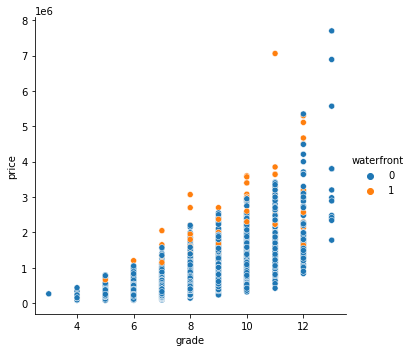

In [204]:
sns.relplot(y="price",x="grade",hue="waterfront",data=df)

Podemos ver que si escogemos todos los valores que tengan un grado 6 o mayor y tengan vistas al mar serán mayor al precio
pedido